### MARKDOWN ###

In [1]:
# Import Libraries
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import pyplot as plt

### CLEANING ###

In [2]:
# Import everything
palsy_c = pd.read_csv('../Datasets/PalsyConstipated.csv').rename(columns={'Palsy Constipated QOLS':'QOLS'}).set_index('ID').drop(columns='Constipated')
palsy_nc = pd.read_csv('../Datasets/PalsyNonConstipated.csv').rename(columns={'Palsy Non-Constipated QOLS':'QOLS'}).set_index('ID').drop(columns='Constipated')
control_c = pd.read_csv('../Datasets/ControlConstipated.csv').rename(columns={'Control Constipated QOLS':'QOLS'}).set_index('ID').drop(columns='Unnamed: 15')
control_nc = pd.read_csv('../Datasets/ControlNonConstipated.csv').rename(columns={'Control Non-Constipated QOLS':'QOLS'}).set_index('ID')

In [3]:
# Standardize Cytokine column names
palsy_c.rename(inplace=True,columns=
                {
                    'IL1 B':'IL1B',
                    'IL-6':'IL6',
                    'IL-8':'IL8',
                    'IL-10':'IL10',
                    'IL-1B':'IL1B',
                    'TNF-Alpha':'TNFAlpha',
                    'Palsy Constipated QOLS':'QOLS'
                })
palsy_nc.rename(inplace=True,columns=
                {
                    'IL1 B':'IL1B',
                    'IL-6':'IL6',
                    'IL-8':'IL8',
                    'IL-10':'IL10',
                    'IL-1B':'IL1B',
                    'TNF-Alpha':'TNFAlpha',
                    'Palsy Constipated QOLS':'QOLS'
                })

In [4]:
# Make a general palsy dataframe
palsy = palsy_c.append(palsy_nc,sort=True)
palsy.shape

(63, 19)

In [5]:
# Make a general control dataframe
control = control_c.append(control_nc,sort=True)

In [6]:
# Make an overall dataframe
data = pd.concat([palsy,control],sort=False).dropna(how='all')
data.drop(data.tail(1).index,inplace=True)
data['HOSPITALIZATION AND CAREGIVER-REPORTED HEALTH'] = data['HOSPITALIZATION AND CAREGIVER-REPORTED HEALTH'].apply(lambda x: int(x))

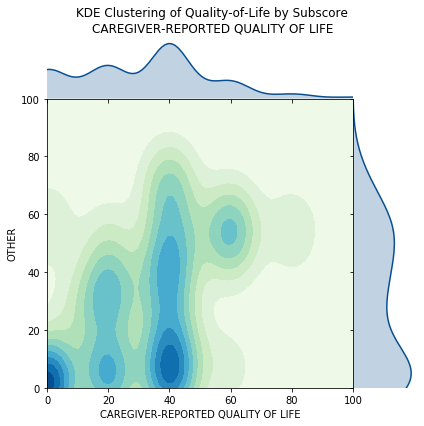

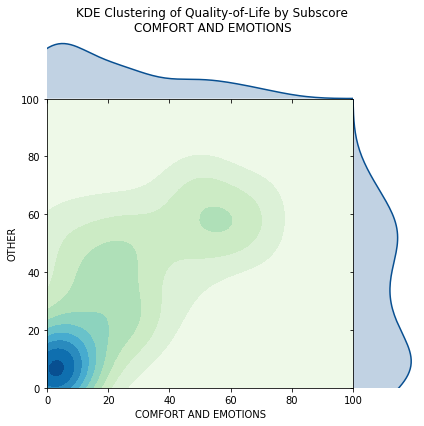

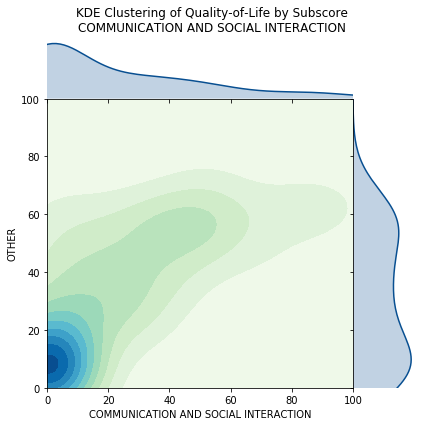

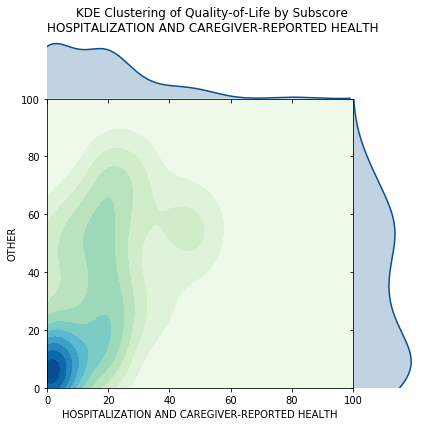

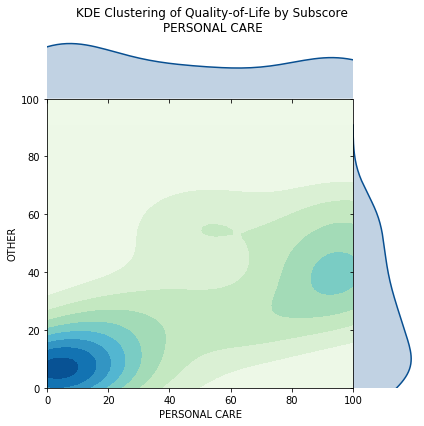

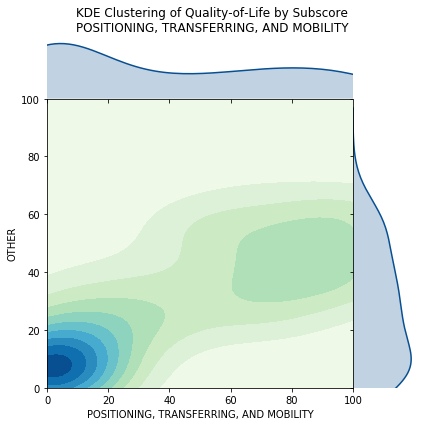

In [14]:
cat_list = ['CAREGIVER-REPORTED QUALITY OF LIFE','COMFORT AND EMOTIONS','COMMUNICATION AND SOCIAL INTERACTION', 'HOSPITALIZATION AND CAREGIVER-REPORTED HEALTH','PERSONAL CARE','POSITIONING, TRANSFERRING, AND MOBILITY']
for cat in cat_list:
    excluded = [c for c in cat_list if c != cat]
    cat_data = data.copy()
    cat_data['OTHER'] = data[excluded].mean(axis=1)
    fac = sns.jointplot(kind='kde',data=cat_data,x=cat,y='OTHER',cmap='GnBu',xlim=(0,100),ylim=(0,100),n_levels=10,space=0,marginal_kws={'color':'#084F91'})
    fac.ax_joint.set_facecolor('#EEF9E8')
    fac.fig.subplots_adjust(top=.9)
    fac.fig.suptitle('KDE Clustering of Quality-of-Life by Subscore\n{}' .format(cat))
    plt.savefig('../Figures/{}.png'.format(cat.replace(' ','_').replace('-','_')))